In [2]:
import numpy as np
import matplotlib.pyplot as plt
from test_cases import *
import sklearn
import sklearn.datasets

from utils import plot_decision_boundary, sigmoid, load_dataset, load_extra_datasets

%matplotlib inline

In [3]:
np.random.seed(14)

In [15]:
# Get the flower dataset
X, y = load_dataset()

print(X.shape,y.shape)


(2, 400) (1, 400)


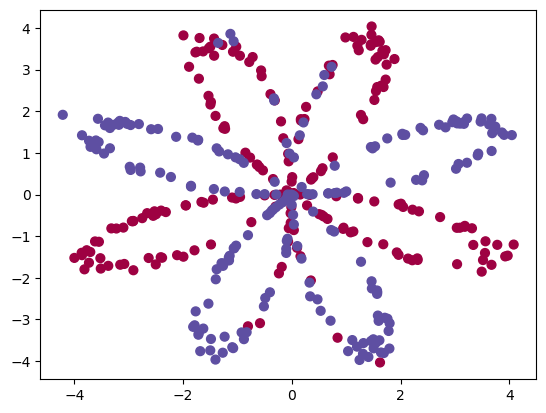

In [16]:
plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [5]:
# 2 layer neural network
def compute_layer_size_from_data(x_, y_):
    n_0 = x_.shape[0]
    n_2 = y_.shape[0]
    
    return n_0, n_2


In [6]:
sample_n_0, sample_n_1 = compute_layer_size_from_data(X,y)
print(sample_n_0, sample_n_1)

2 1


In [13]:
def initialize_parameters(n_0, n_1, n_2):
    w1 = np.random.randn(n_1, n_0) * 0.01
    b1 = np.zeros((n_1,1))
    
    w2 = np.random.randn(n_2, n_1) * 0.01
    b2 = np.zeros((n_2,1))
    
    assert(w1.shape == (n_1, n_0))
    assert(b1.shape == (n_1, 1))
    assert(w2.shape == (n_2, n_1))
    assert(b2.shape == (n_2, 1))
    
    return {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

In [14]:
sample_params = initialize_parameters(sample_n_0, 4, sample_n_1)
print(sample_params)

{'w1': array([[ 0.01152599, -0.00224236],
       [-0.00326061, -0.00030911],
       [ 0.00355717,  0.00849587],
       [-0.00122154, -0.00680852]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'w2': array([[-0.01067877, -0.00076679,  0.00572963,  0.00457947]]), 'b2': array([[0.]])}


In [27]:
def forward_propogation(x_, params):
    w1 = params["w1"]
    b1 = params["b1"]
    
    w2 = params["w2"]
    b2 = params["b2"]
    
    # compute forward pass values in order
    z1 = np.dot(w1, x_) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = 1 / (1 + np.exp(-z2))
    
    forward_params_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    assert(a2.shape == (1, x_.shape[1]))
    return a2, forward_params_cache


In [31]:
sample_a2, sample_forward_params = forward_propogation(X, sample_params)
print(sample_a2.shape)
print(np.mean(sample_forward_params["a2"]), np.mean(sample_forward_params["z2"]), 
                                                   np.mean(sample_forward_params["a1"]), 
                                                           np.mean(sample_forward_params["z1"]))

(1, 400)
0.5000018596487178 7.438594959662014e-06 -0.00012964123861792693 -0.0001296898827466104


In [25]:
def backward_propogation(params, forward_params_cache, x_, y_):
    a1 = forward_params_cache["a1"]
    z1 = forward_params_cache["z1"]
    a2 = forward_params_cache["a2"]
    z2 = forward_params_cache["z2"]
    
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    m = x_.shape[1]
    dz2 = np.subtract(a2, y_)
    dw2 = (1/m) * np.dot(dz2, a1.T)
    dz1 = np.dot(w2.T, dz2) * (1 - np.power(a1, 2))
    dw1 = (1/m) * np.dot(dz1, x_.T)
    
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    return {
        "dw1": dw1,
        "dw2": dw2,
        "db1": db1,
        "db2": db2
    }


In [36]:
sample_gradient_params = backward_propogation(sample_params, sample_forward_params, X, y)
print(sample_gradient_params)

{'dw1': array([[ 2.42193376e-04, -2.10539712e-03],
       [ 1.73739312e-05, -1.51081068e-04],
       [-1.29411704e-04,  1.12736702e-03],
       [-1.03693595e-04,  9.01443413e-04]]), 'dw2': array([[-7.03174299e-04,  1.29898259e-05,  1.59257860e-03,
        -1.31332609e-03]]), 'db1': array([[-1.77761220e-07],
       [-1.85653146e-09],
       [ 8.76687111e-09],
       [ 1.53441035e-08]]), 'db2': array([[1.85964872e-06]])}


In [32]:
def cost_function(a2, y_):
    log_prob = (y_ * np.log(a2)) + ((1-y_) * np.log(1-a2))
    total_cost = -np.mean(log_prob)
    total_cost = np.squeeze(total_cost)   # turns [[a]] type value to a
    
    assert(isinstance(total_cost, float)) # makes sure that the value is float
    
    return total_cost


In [33]:
print(cost_function(sample_a2, y))

0.6931577839678628


In [34]:
def update_parameters(params, gradients, learning_rate):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]
    
    dw1 = gradients["dw1"]
    db1 = gradients["db1"]
    dw2 = gradients["dw2"]
    db2 = gradients["db2"]
    
    # update rule
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    # return updated parameters
    return {
        "w1": w1,
        "w2": w2,
        "b1": b1,
        "b2": b2
    }

In [39]:
sample_updated_params = update_parameters(sample_params, sample_gradient_params, 1.2)
print(sample_updated_params)

{'w1': array([[ 0.01123536,  0.00028412],
       [-0.00328146, -0.00012782],
       [ 0.00371247,  0.00714303],
       [-0.00109711, -0.00789025]]), 'w2': array([[-0.00983496, -0.00078238,  0.00381853,  0.00615546]]), 'b1': array([[ 2.13313464e-07],
       [ 2.22783775e-09],
       [-1.05202453e-08],
       [-1.84129242e-08]]), 'b2': array([[-2.23157846e-06]])}


In [42]:
def model(x_, y_, n_1, n_iterations, print_cost = False):
    n_0, n_2 = compute_layer_size_from_data(X, y)
    
    # initialize parameters
    params = initialize_parameters(n_0, n_1, n_2)
    W1 = params["w1"]
    B1 = params["b1"]
    W2 = params["w2"]
    B2 = params["b2"]
    
    for i in range(n_iterations):
        A2, forward_params_cache = forward_propogation(X, params)
        gradient_of_params = backward_propogation(params, forward_params_cache, X, y)
        
        params = update_parameters(params, gradient_of_params, 1.2)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost at iteration {i} is {cost_function(A2, y)}")
    
    return params
    

In [77]:
sample_trained_params = model(X, y, 4, 10000, print_cost=True)
print(sample_trained_params)

Cost at iteration 1 is 0.693163536904074
Cost at iteration 2 is 0.693134481414009
Cost at iteration 3 is 0.6931058284365962
Cost at iteration 4 is 0.6930711932229809
Cost at iteration 5 is 0.6930236345034223
Cost at iteration 6 is 0.6929542684683095
Cost at iteration 7 is 0.692850736193249
Cost at iteration 8 is 0.6926953694323995
Cost at iteration 9 is 0.6924630506659868
Cost at iteration 10 is 0.6921190983672052
Cost at iteration 11 is 0.6916182033110475
Cost at iteration 12 is 0.6909066283910147
Cost at iteration 13 is 0.6899312469370282
Cost at iteration 14 is 0.6886589039658688
Cost at iteration 15 is 0.6871046003371208
Cost at iteration 16 is 0.6853549983858759
Cost at iteration 17 is 0.6835629633300512
Cost at iteration 18 is 0.6818998538204084
Cost at iteration 19 is 0.6804894392415132
Cost at iteration 20 is 0.6793708352730807
Cost at iteration 21 is 0.6785117040820172
Cost at iteration 22 is 0.6778488628951854
Cost at iteration 23 is 0.6773225589723197
Cost at iteration 24 is

Cost at iteration 1235 is 0.28560260290167944
Cost at iteration 1236 is 0.2855860092085222
Cost at iteration 1237 is 0.28556942527925033
Cost at iteration 1238 is 0.2855528510965428
Cost at iteration 1239 is 0.28553628664324004
Cost at iteration 1240 is 0.28551973190234364
Cost at iteration 1241 is 0.2855031868570168
Cost at iteration 1242 is 0.2854866514905842
Cost at iteration 1243 is 0.2854701257865323
Cost at iteration 1244 is 0.285453609728509
Cost at iteration 1245 is 0.2854371033003241
Cost at iteration 1246 is 0.28542060648594914
Cost at iteration 1247 is 0.28540411926951764
Cost at iteration 1248 is 0.2853876416353248
Cost at iteration 1249 is 0.285371173567828
Cost at iteration 1250 is 0.2853547150516464
Cost at iteration 1251 is 0.2853382660715611
Cost at iteration 1252 is 0.28532182661251526
Cost at iteration 1253 is 0.2853053966596142
Cost at iteration 1254 is 0.2852889761981249
Cost at iteration 1255 is 0.28527256521347666
Cost at iteration 1256 is 0.2852561636912606
Cost

Cost at iteration 2461 is 0.2714969998241156
Cost at iteration 2462 is 0.2714893200032775
Cost at iteration 2463 is 0.2714816441465544
Cost at iteration 2464 is 0.2714739722502158
Cost at iteration 2465 is 0.2714663043105373
Cost at iteration 2466 is 0.2714586403237998
Cost at iteration 2467 is 0.27145098028629017
Cost at iteration 2468 is 0.2714433241943006
Cost at iteration 2469 is 0.27143567204412933
Cost at iteration 2470 is 0.2714280238320799
Cost at iteration 2471 is 0.2714203795544615
Cost at iteration 2472 is 0.27141273920758907
Cost at iteration 2473 is 0.271405102787783
Cost at iteration 2474 is 0.2713974702913693
Cost at iteration 2475 is 0.27138984171467956
Cost at iteration 2476 is 0.27138221705405086
Cost at iteration 2477 is 0.271374596305826
Cost at iteration 2478 is 0.271366979466353
Cost at iteration 2479 is 0.2713593665319857
Cost at iteration 2480 is 0.27135175749908325
Cost at iteration 2481 is 0.2713441523640104
Cost at iteration 2482 is 0.2713365511231373
Cost at

Cost at iteration 3770 is 0.2638766585785875
Cost at iteration 3771 is 0.2638721576234645
Cost at iteration 3772 is 0.2638676580113171
Cost at iteration 3773 is 0.26386315974066116
Cost at iteration 3774 is 0.26385866281001125
Cost at iteration 3775 is 0.26385416721788124
Cost at iteration 3776 is 0.2638496729627839
Cost at iteration 3777 is 0.263845180043231
Cost at iteration 3778 is 0.26384068845773334
Cost at iteration 3779 is 0.26383619820480075
Cost at iteration 3780 is 0.263831709282942
Cost at iteration 3781 is 0.26382722169066475
Cost at iteration 3782 is 0.26382273542647583
Cost at iteration 3783 is 0.2638182504888809
Cost at iteration 3784 is 0.2638137668763845
Cost at iteration 3785 is 0.2638092845874903
Cost at iteration 3786 is 0.26380480362070075
Cost at iteration 3787 is 0.26380032397451736
Cost at iteration 3788 is 0.2637958456474405
Cost at iteration 3789 is 0.2637913686379694
Cost at iteration 3790 is 0.26378689294460234
Cost at iteration 3791 is 0.2637824185658363
Co

Cost at iteration 5050 is 0.25601526684019005
Cost at iteration 5051 is 0.2560013263080414
Cost at iteration 5052 is 0.2559874227620096
Cost at iteration 5053 is 0.25597355654108983
Cost at iteration 5054 is 0.25595972797460864
Cost at iteration 5055 is 0.25594593738226656
Cost at iteration 5056 is 0.25593218507418486
Cost at iteration 5057 is 0.25591847135095624
Cost at iteration 5058 is 0.2559047965036991
Cost at iteration 5059 is 0.2558911608141148
Cost at iteration 5060 is 0.2558775645545491
Cost at iteration 5061 is 0.2558640079880562
Cost at iteration 5062 is 0.2558504913684662
Cost at iteration 5063 is 0.2558370149404553
Cost at iteration 5064 is 0.2558235789396192
Cost at iteration 5065 is 0.25581018359254903
Cost at iteration 5066 is 0.25579682911690954
Cost at iteration 5067 is 0.25578351572152064
Cost at iteration 5068 is 0.2557702436064403
Cost at iteration 5069 is 0.25575701296305065
Cost at iteration 5070 is 0.25574382397414536
Cost at iteration 5071 is 0.2557306768140195

Cost at iteration 6320 is 0.22646868976672352
Cost at iteration 6321 is 0.22645920671350198
Cost at iteration 6322 is 0.22644973878000854
Cost at iteration 6323 is 0.226440285914236
Cost at iteration 6324 is 0.22643084806453945
Cost at iteration 6325 is 0.22642142517963115
Cost at iteration 6326 is 0.22641201720857532
Cost at iteration 6327 is 0.2264026241007829
Cost at iteration 6328 is 0.226393245806007
Cost at iteration 6329 is 0.22638388227433798
Cost at iteration 6330 is 0.2263745334561986
Cost at iteration 6331 is 0.22636519930233984
Cost at iteration 6332 is 0.2263558797638362
Cost at iteration 6333 is 0.22634657479208173
Cost at iteration 6334 is 0.22633728433878553
Cost at iteration 6335 is 0.2263280083559679
Cost at iteration 6336 is 0.2263187467959563
Cost at iteration 6337 is 0.22630949961138142
Cost at iteration 6338 is 0.22630026675517356
Cost at iteration 6339 is 0.22629104818055878
Cost at iteration 6340 is 0.2262818438410554
Cost at iteration 6341 is 0.2262726536904704

Cost at iteration 7313 is 0.2208548030478787
Cost at iteration 7314 is 0.2208512111935366
Cost at iteration 7315 is 0.22084762162721475
Cost at iteration 7316 is 0.22084403434589236
Cost at iteration 7317 is 0.22084044934655403
Cost at iteration 7318 is 0.22083686662618998
Cost at iteration 7319 is 0.22083328618179593
Cost at iteration 7320 is 0.2208297080103732
Cost at iteration 7321 is 0.22082613210892854
Cost at iteration 7322 is 0.22082255847447427
Cost at iteration 7323 is 0.22081898710402817
Cost at iteration 7324 is 0.2208154179946135
Cost at iteration 7325 is 0.2208118511432589
Cost at iteration 7326 is 0.22080828654699863
Cost at iteration 7327 is 0.22080472420287228
Cost at iteration 7328 is 0.22080116410792489
Cost at iteration 7329 is 0.22079760625920686
Cost at iteration 7330 is 0.22079405065377414
Cost at iteration 7331 is 0.22079049728868788
Cost at iteration 7332 is 0.2207869461610147
Cost at iteration 7333 is 0.22078339726782673
Cost at iteration 7334 is 0.220779850606

Cost at iteration 8409 is 0.21785199951445292
Cost at iteration 8410 is 0.21784984604912888
Cost at iteration 8411 is 0.21784769332595233
Cost at iteration 8412 is 0.21784554134431575
Cost at iteration 8413 is 0.21784339010361214
Cost at iteration 8414 is 0.2178412396032354
Cost at iteration 8415 is 0.2178390898425799
Cost at iteration 8416 is 0.21783694082104077
Cost at iteration 8417 is 0.2178347925380136
Cost at iteration 8418 is 0.217832644992895
Cost at iteration 8419 is 0.2178304981850819
Cost at iteration 8420 is 0.217828352113972
Cost at iteration 8421 is 0.2178262067789637
Cost at iteration 8422 is 0.21782406217945602
Cost at iteration 8423 is 0.2178219183148486
Cost at iteration 8424 is 0.21781977518454174
Cost at iteration 8425 is 0.21781763278793648
Cost at iteration 8426 is 0.21781549112443435
Cost at iteration 8427 is 0.21781335019343764
Cost at iteration 8428 is 0.2178112099943492
Cost at iteration 8429 is 0.2178090705265727
Cost at iteration 8430 is 0.21780693178951224


Cost at iteration 9658 is 0.215593156828202
Cost at iteration 9659 is 0.21559160712151346
Cost at iteration 9660 is 0.21559005773516085
Cost at iteration 9661 is 0.21558850866901622
Cost at iteration 9662 is 0.21558695992295226
Cost at iteration 9663 is 0.21558541149684168
Cost at iteration 9664 is 0.21558386339055743
Cost at iteration 9665 is 0.2155823156039728
Cost at iteration 9666 is 0.21558076813696128
Cost at iteration 9667 is 0.21557922098939655
Cost at iteration 9668 is 0.21557767416115264
Cost at iteration 9669 is 0.21557612765210366
Cost at iteration 9670 is 0.21557458146212408
Cost at iteration 9671 is 0.21557303559108856
Cost at iteration 9672 is 0.21557149003887197
Cost at iteration 9673 is 0.21556994480534952
Cost at iteration 9674 is 0.21556839989039658
Cost at iteration 9675 is 0.21556685529388872
Cost at iteration 9676 is 0.21556531101570178
Cost at iteration 9677 is 0.2155637670557119
Cost at iteration 9678 is 0.2155622234137953
Cost at iteration 9679 is 0.21556068008

In [44]:
def predict(params, x_):
    A2, forward_prop_params = forward_propogation(x_, params)
    predictions = np.where(A2 >= 0.5, 1, np.where(A2 < 0.5, 0, A2))
    
    return predictions

In [45]:
sample_predictions = predict(sample_trained_params, X)
print(sample_predictions)

[[0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [47]:
print ('Accuracy: %d' % float((np.dot(y,sample_predictions.T) + np.dot(1-y,1-sample_predictions.T))
                              /float(y.size)*100) + '%')

Accuracy: 91%


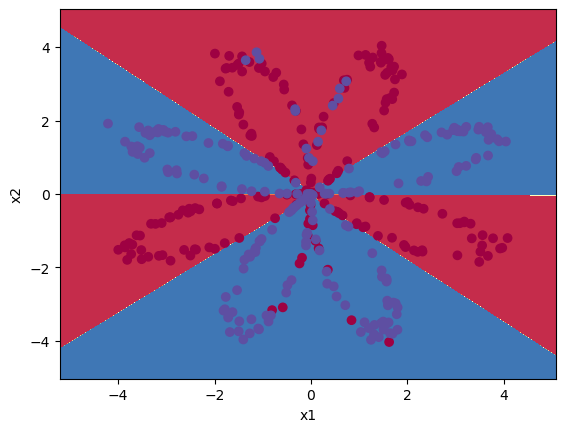

In [49]:
plot_decision_boundary(lambda x: predict(sample_trained_params, x.T), X, y)

In [50]:
hidden_layer_size = [1, 2, 4, 5, 10, 20, 40]

def cross_validation_layer_size(h_l_size, x_, y_):
    plt.figure(figsize=(16, 32))
    for i, n_h in enumerate(h_l_size):
        plt.subplot(5, 2, i+1)
        plt.title(f"hidden layer of size: {n_h}")
        params = model(x_, y_, n_h, 4000)
        plot_decision_boundary(lambda x: predict(params, x.T), x_, y_)
        predictions = predict(params, x_)
        accuracy = float((np.dot(y_,predictions.T) + np.dot(1-y_,1-predictions.T))
                              /float(y_.size)*100)
        print(f"Accuracy for the {n_h} layer predictions is: {accuracy} %")
        

Accuracy for the 1 layer predictions is: 67.25 %
Accuracy for the 2 layer predictions is: 67.0 %
Accuracy for the 4 layer predictions is: 90.25 %
Accuracy for the 5 layer predictions is: 91.0 %
Accuracy for the 10 layer predictions is: 90.75 %
Accuracy for the 20 layer predictions is: 90.75 %
Accuracy for the 40 layer predictions is: 91.25 %


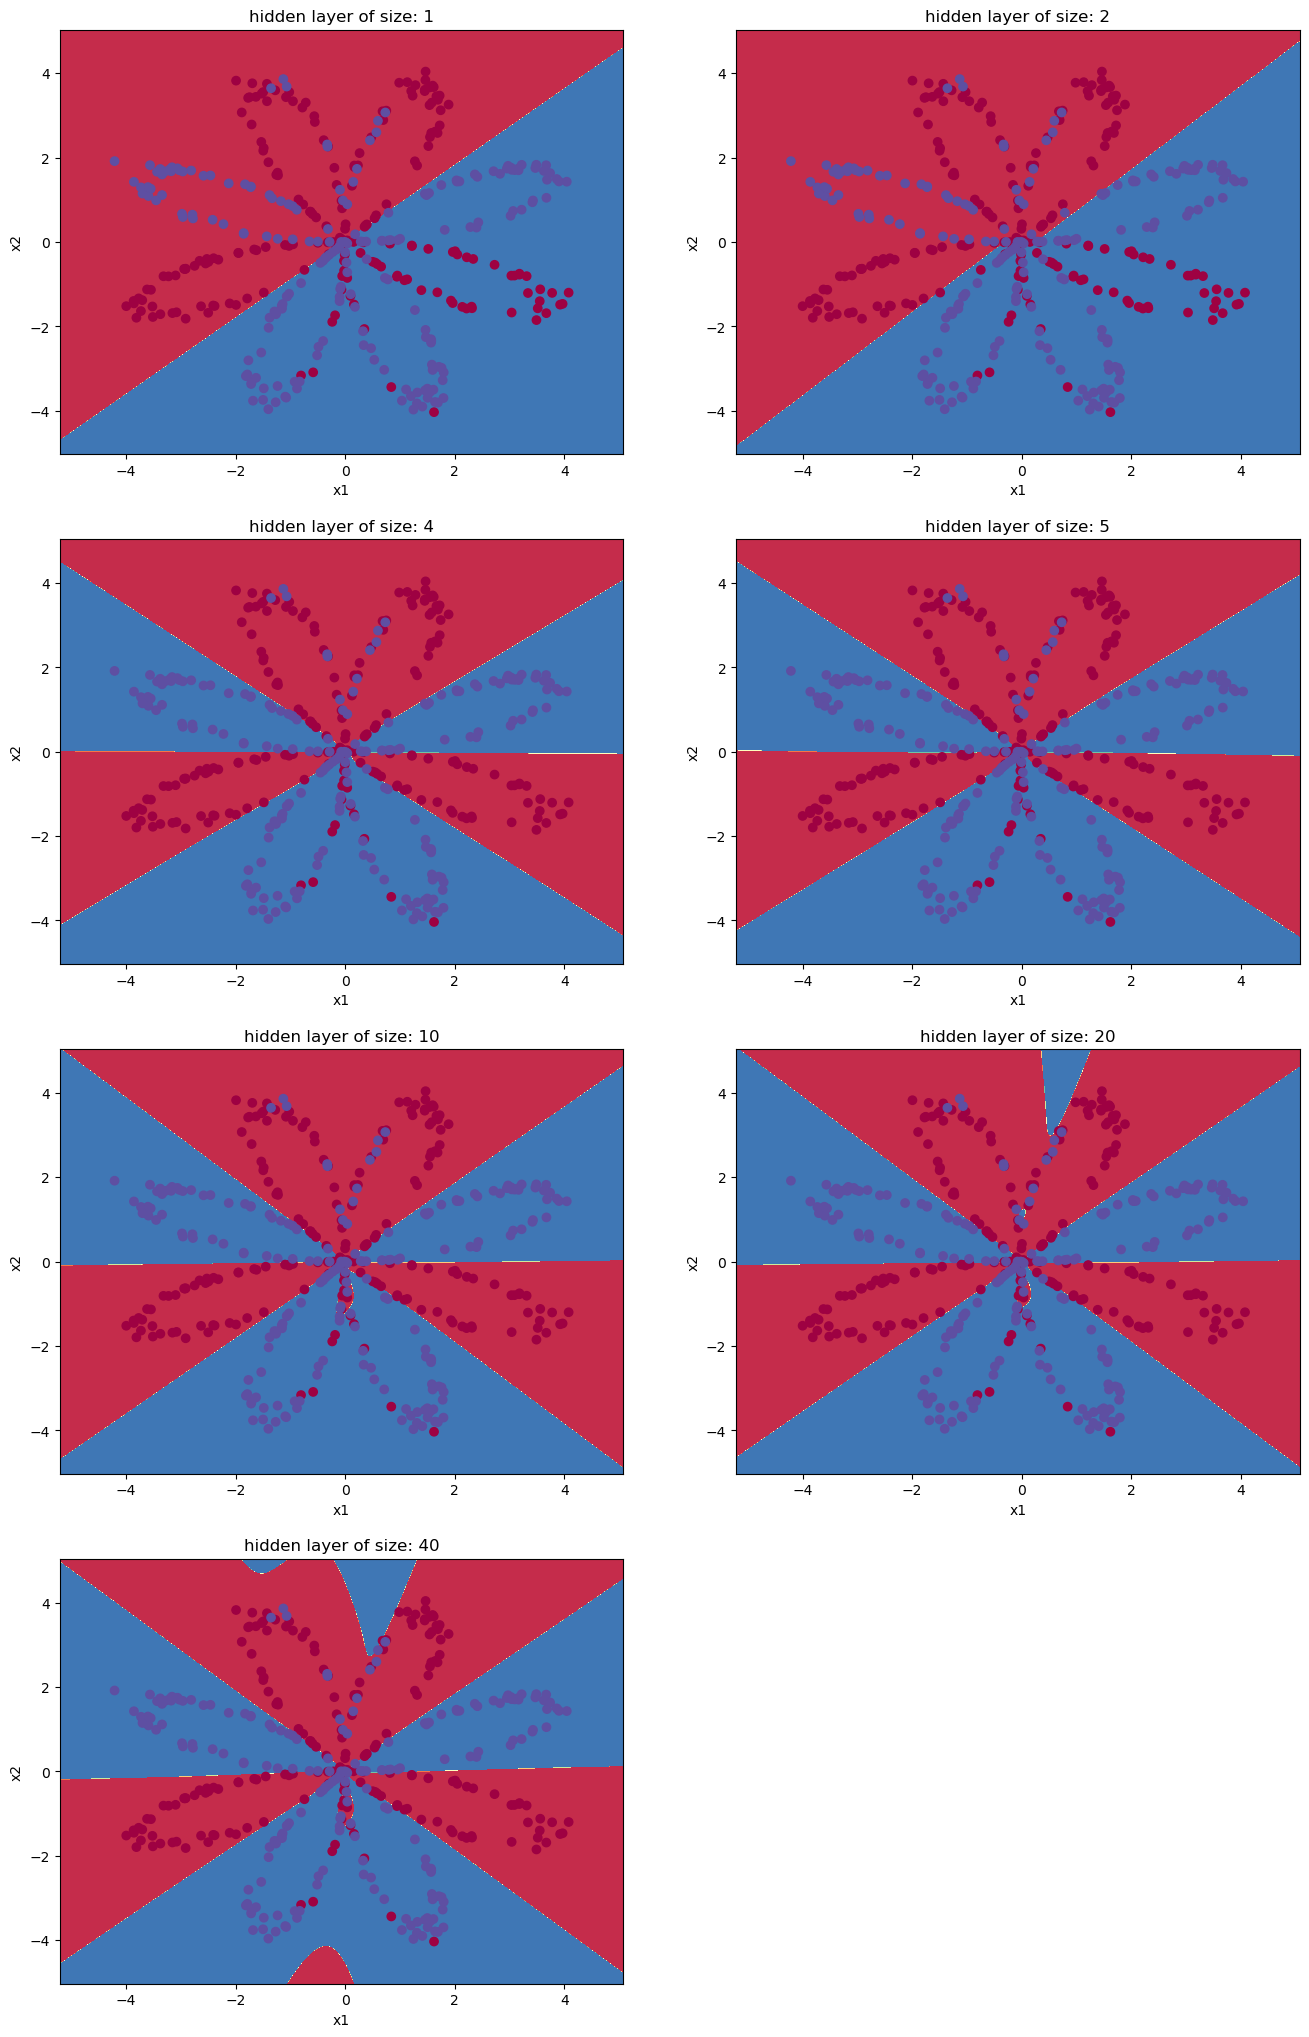

In [51]:
cross_validation_layer_size(hidden_layer_size, X, y)

In [52]:
# model of size 5 is a good enough accuracy measure fot the model
